# LAB 2.1 - Customized loss function

The labs require a `tensorflow` version lower than the default one used in Google Colab. Run the following cell to downgrade TensorFlow accordingly.

In [ ]:
import os
def downgrade_tf_version():
    os.system("!yes | pip uninstall -y tensorflow")
    os.system("!yes | pip install tensorflow==2.12.0")
    os.kill(os.getpid(), 9)
downgrade_tf_version()

In [2]:
!wget -nc --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2021.deeplearning/main/content/init.py
import init; init.init(force_download=False); init.get_weblink() 

In [445]:
from local.lib.rlxmoocapi import submit, session
import inspect
session.LoginSequence(endpoint=init.endpoint, course_id=init.course_id, lab_id="L02.01", varname="student");

## Loading the Fashion MNIST database...

In [7]:
import os
import gzip
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
import tensorflow as tf
tf.__version__

In [4]:
from tensorflow.keras import datasets
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()
X_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
X_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

In [5]:
import tensorflow as tf
from tensorflow.keras import utils
from sklearn.preprocessing import StandardScaler

input_dim = X_train.shape[1]

scaler = StandardScaler()
X_trainN = scaler.fit_transform(X_train)
X_testN = scaler.transform(X_test)

# convert list of labels to binary class matrix
y_trainOHE = utils.to_categorical(y_train)
nb_classes = y_trainOHE.shape[1]

## TASK 1. Basic model

Define a new model using the keras sequential API. The model must have four hidden layers with the following neurons `[128,64,32,16]`. Comply with the following:

- For all the hidden layers use the `relu` activation function. 
- Use `nb_classes` and `softmax` activation for the output layer.
- Specify all activations as part of the `Dense` layer parameter, not as a separate layer.
- You must return an instance of a `Sequential` model. 
- **DO NOT** invoke `compile` or `fit`.

Your model structure should be as follows

<pre>
Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
dense_308 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_309 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_310 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_311 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_312 (Dense)            (None, 10)                170       
=================================================================
Total params: 111,514
Trainable params: 111,514
Non-trainable params: 0
_________________________________________________________________

</pre>

In [ ]:
def get_basic_model(input_dim, nb_classes):
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense

    model = ...
    
    return model

In [93]:
model = get_basic_model(input_dim=784, nb_classes=10)
model.summary()

**Registra tu solución en linea**

In [84]:
student.submit_task(namespace=globals(), task_id='T1');

Run the following cells to train and test the model.

In [86]:
model = get_basic_model(input_dim=784, nb_classes=10)

In [92]:
from tensorflow.keras import regularizers, optimizers

# or instantiate an optimizer before passing it to model.compile
sgd = optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)
model.fit(X_trainN[:500,:], y_trainOHE[:500,:], epochs=1000, batch_size=16, validation_split=0, verbose=0)

preds = model.predict(X_testN, verbose=0)
preds = np.argmax(preds,axis=1)
Accuracy = np.mean(preds == y_test)
print('Accuracy = %.2f%s'%(Accuracy*100, '%'))

**UNGRADED TASK**: Create a graph with the histogram of the network weigths in the first hidden layer. It should look like the the following.

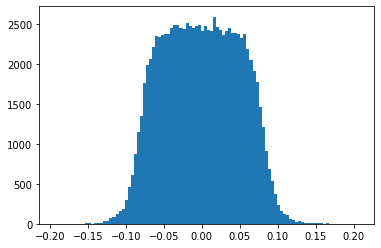

In [94]:

from IPython.display import Image
Image("local/imgs/L21W1.png")


In [ ]:
plt.hist(..., bins=100);

## TASK 2: $L_2$ regularization

Create a model like on TASK 1, but include $L_2$ regularization to every hidden layer (in `kernel_regularizer`) with a regularization parameter equal to 0.0001. 

Use [tf.keras.regularizers.L2](https://www.tensorflow.org/api_docs/python/tf/keras/regularizers/L2)

In [ ]:
def get_L2_model(input_dim, nb_classes):
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense
    from tensorflow.keras import regularizers
    model = ...
    return model

In [34]:
model = get_L2_model(784, 10)
model.summary()

inspect layer regularizers

In [132]:
for layer in model.layers:
    print (layer.name, '-->', layer.kernel_regularizer)

**Registra tu solución en linea**

In [69]:
student.submit_task(namespace=globals(), task_id='T2');

Run the following cell to train and test the model

In [71]:
from tensorflow.keras import optimizers
model = get_L2_model(784, 10)

# or instantiate an optimizer before passing it to model.compile
sgd = optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)
model.fit(X_trainN[:500,:], y_trainOHE[:500,:], epochs=1000, batch_size=16, validation_split=0, verbose=0)

preds = model.predict(X_testN, verbose=0)
preds = np.argmax(preds,axis=1)
Accuracy = np.mean(preds == y_test)
print('Accuracy = %.2f%s'%(Accuracy*100, '%'))

**UNGRADED TASK**: Create a graph with the histogram of the network weigths in the first hidden layer. It should look like the the following.

Compare it with the histogram obtained in the previous exercise. Is there any effect due to the regularization?

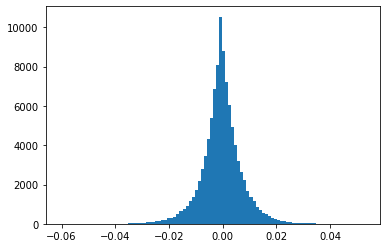

In [73]:

from IPython.display import Image
Image("local/imgs/L21W2.png")


In [72]:
plt.hist(..., bins=100)

## TASK 3: $L_1$+$L_2$ regularization

Create a model like on TASK 1, but use $L_1$+$L_2$ regularization to every hidden layer (in `kernel_regularizer`) with both regularization parameters equal to 0.0001. 

Use [tf.keras.regularizers.L1L2](https://www.tensorflow.org/api_docs/python/tf/keras/regularizers/L1L2)

In [ ]:
def get_L1L2_model(input_dim, nb_classes):
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense
    from tensorflow.keras import regularizers
    model = ...
    return model

In [136]:
model = get_L1L2_model(784, 10)
model.summary()

inspect layer regularizers

In [137]:
for layer in model.layers:
    print (layer.name, '-->', layer.kernel_regularizer)

**Registra tu solución en linea**

In [163]:
student.submit_task(namespace=globals(), task_id='T3');

Run the following cell to train and test the model

In [164]:
from tensorflow.keras import optimizers
model = get_L1L2_model(784, 10)

# or instantiate an optimizer before passing it to model.compile
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)
model.fit(X_trainN[:500,:], y_trainOHE[:500,:], epochs=1000, batch_size=16, validation_split=0, verbose=0)

preds = model.predict(X_testN, verbose=0)
preds = np.argmax(preds,axis=1)
Accuracy = np.mean(preds == y_test)
print('Accuracy = %.2f%s'%(Accuracy*100, '%'))

**UNGRADED TASK**: Create a graph with the histogram of the network weigths in the first hidden layer. It should look like the the following.

Compare it with the histograms obtained in the previous exercises. What is the effect of applying $L_1$ regularization?

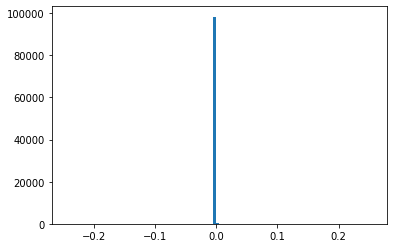

In [166]:

from IPython.display import Image
Image("local/imgs/L21W3.png")


In [ ]:
plt.hist(..., bins=100)

Create a graph with the histogram of the network weigths in the first hidden layer. Compare it with the histograms obtained in the previous exercises. What is the effect of applying $L_1$ regularization?

### TASK 4: Customized loss function

Complete the function below to implement the following loss function:

$$\mathcal{L}({\bf{\hat{y}}},{\bf{y}}) = -\frac{1}{N}\sum_{i=1}^N \sum_{j=1}^C {\bf{1}}_{y_i \in C_j} w_{j}\log p_{model}[y_i \in C_j]$$

which corresponds to a weighted version of the categorical cross entropy loss function (take a look to the [section 2.2](https://rramosp.github.io/2021.deeplearning/content/U2.02%20-%20The%20Multilayer%20Perceptron.html#sequential-models) to remember the notation of the categorical cross-entropy loss function).

Note the following observations:

- the function below **returns a function** tied to a specific set of weights. This way we can create different loss functions tied to different weights.
- you can assume `y_pred` to be the output of a **softmax** layer. This is, that for each `y` there is a predicted probability for each class $\in [0,1]$ and summing all up to 1.
- before using the `tf.mat.log` function, pass `y_pred` through [`tf.clip_by_value`](https://www.tensorflow.org/api_docs/python/tf/clip_by_value) to ensure any value is between `K.epsilon()` and `1-K.epsilon()`. This is to avoid extreme values close to `0` or close to `1` which might cause numerical issues.
- both `y_pred` and `y_true` will be tensors of shape `(m,c)` with `m` being the number of data points and `c` the number of classes.
- your answer must be accurate up to three decimal number.
- use [`tf.reduce_mean`](https://www.tensorflow.org/api_docs/python/tf/math/reduce_mean) for the first summation, and [`tf.reduce_sum`](`https://www.tensorflow.org/api_docs/python/tf/math/reduce_sum`) for the second summation with the corresponding `axis` argument.

**HINT**: experiment and understand `tf.reduce_mean` and `tf.reduce_sum` before implementing the function

In [187]:
from tensorflow.keras import backend as K
K.epsilon()

In [427]:
z = np.random.randint(100, size=(3,5))
print (z)
print (tf.reduce_mean(z))
print (tf.reduce_sum(z, axis=0))

In [ ]:
def weighted_categorical_crossentropy(weights):
    from tensorflow.keras import backend as K
            
    def loss_function(y_true, y_pred):
        # clip y_pred to prevent NaN's and Inf's
        y_pred = ...
        # compute loss
        loss = ...
        return loss
    
    return loss_function

manually test your code with the following cases

In [422]:
y_pred = np.array([[0.14285714, 0.        , 0.68367347, 0.17346939],
                   [0.01020408, 0.60714286, 0.10204082, 0.28061224],
                   [0.1733871 , 0.29435484, 0.24193548, 0.29032258],
                   [0.25403226, 0.24596774, 0.19758065, 0.30241935],
                   [0.52073733, 0.10138249, 0.11981567, 0.25806452],
                   [0.47843137, 0.05882353, 0.24313725, 0.21960784]]).astype(np.float32)

y_true = np.array([[0, 1, 0, 0],
                   [0, 1, 0, 0],
                   [0, 0, 0, 1],
                   [0, 0, 0, 1],
                   [1, 0, 0, 0],
                   [1, 0, 0, 0]]).astype(np.float32)


loss = weighted_categorical_crossentropy([1,1,1,1])
print ("loss", loss(y_true, y_pred).numpy()) # this should return 3.4066
loss = weighted_categorical_crossentropy([2,3,4,5])
print ("loss", loss(y_true, y_pred).numpy()) # this should return 10.7990


test with random data

In [423]:
m,c = np.random.randint(5)+5,np.random.randint(3)+2
y_true = np.eye(c)[np.random.randint(c, size=m)].astype(int)
y_pred = np.abs(y_true + np.round(np.random.random(size=(m,c)),2)*2 - .5)
y_pred[0,np.argmax(y_true[0])]=0 # force some zero to check clipping
y_pred /= np.sum(y_pred,axis=1).reshape(-1,1).astype(np.float32)

w = np.round(np.random.random(size=c)*10+1,2)

print("y_true:\n", y_true)
print("y_pred:\n", y_pred)
print ("w:", w)

loss = weighted_categorical_crossentropy(w)

print ("\nloss: ", loss(y_true, y_pred).numpy())

**Registra tu solución en linea**

In [446]:
student.submit_task(namespace=globals(), task_id='T4');

**UNGRADED TASK**

**Test your loss function in model**. Use the weighted categorical cross entropy function to train the MLP model on the Fashion MNIST dataset with 2 hidden layers of 64 and 32 neurons respectively. Use the two sets of weights below. Evaluate the model with the test dataset and plot the confusion matrix. 

Your should get confusion matrices such as the ones below. Left is with `weights0`, center with `weights1` and right with `weights2`. Observe what classes improve their accuracy based on the weights.

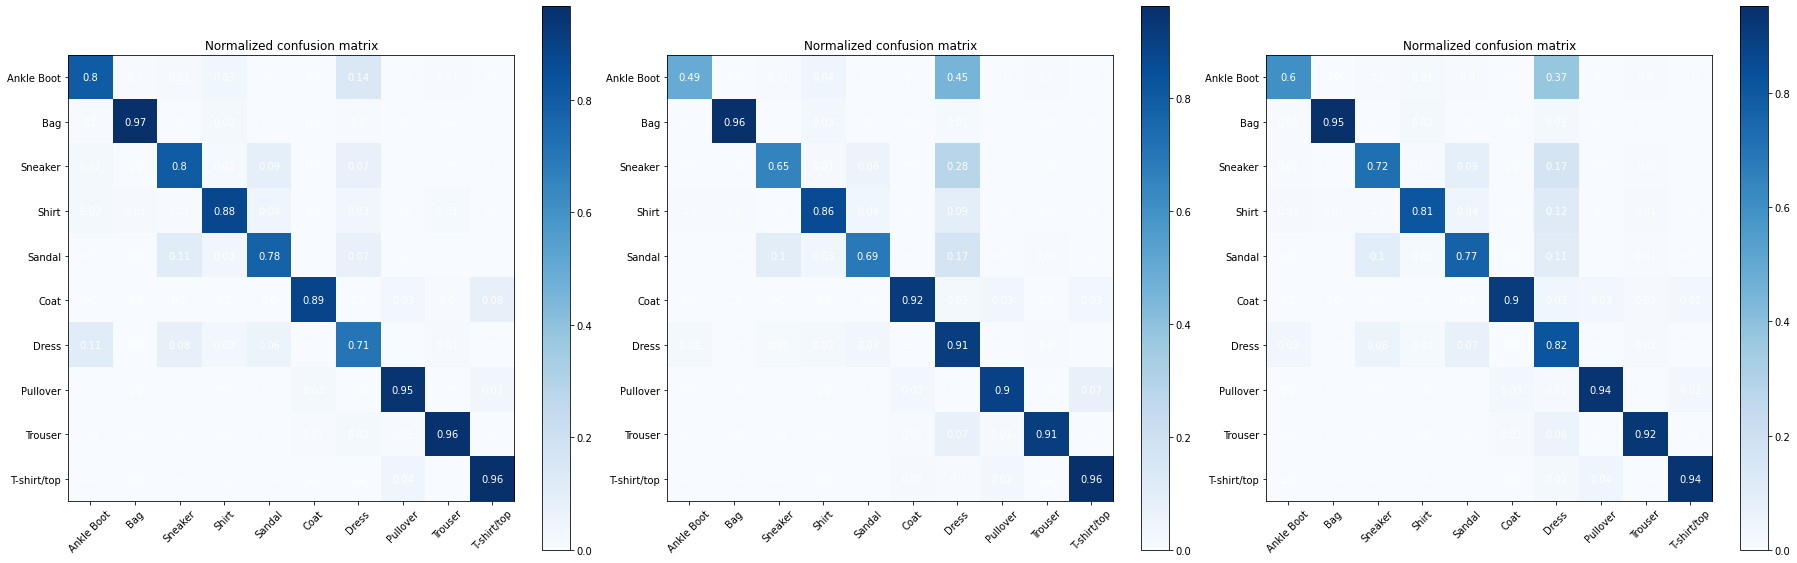

In [486]:
Image("local/imgs/L2.1_W.png")

In [483]:
weights0 = np.array([1,1,1,1,1,1,1,1,1,1])
weights1 = np.array([1,1,1,1,1,1,4,1,1,1])
weights2 = np.array([1.5,1,1,1,1,1,4,1,1,1])

In [448]:
def confusion_matrix(y_true, y_pred):
    from sklearn.metrics import confusion_matrix
    objects = ('Ankle Boot', 'Bag', 'Sneaker', 'Shirt', 'Sandal', 'Coat', 'Dress', 'Pullover', 'Trouser', 'T-shirt/top')
    cm = confusion_matrix(y_true, y_pred)
    cm = cm/np.sum(cm,axis=1)
    cmap = plt.cm.Blues
    tick_marks = np.arange(nb_classes)
    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            text = ax.text(j, i, np.around(cm[i, j],decimals=2),
                           ha="center", va="center", color="w")
    plt.title('Normalized confusion matrix')
    fig.colorbar(im)
    plt.xticks(tick_marks, objects, rotation=45)
    plt.yticks(tick_marks, objects);